# Channel Flow

With channel flow, we will add a force term to the right-hand side of the x-momentum equation to simulate a pressure source.

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y}=-\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu\left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}\right)+F$$

$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y}=-\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right)$$

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2}=-\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y}\right)$$

Discretizing the u-momentum, v-momentum, and pressure equations yields:

$$\begin{split}
& \frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y} = \\
& \qquad -\frac{1}{\rho}\frac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta x} \\
& \qquad +\nu\left(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}\right)+F_{i,j}
\end{split}$$

$$\begin{split}
& \frac{v_{i,j}^{n+1}-v_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i,j-1}^{n}}{\Delta y} = \\
& \qquad -\frac{1}{\rho}\frac{p_{i,j+1}^{n}-p_{i,j-1}^{n}}{2\Delta y} \\
& \qquad +\nu\left(\frac{v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}}{\Delta x^2}+\frac{v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}}{\Delta y^2}\right)
\end{split}$$

$$\begin{split}
& \frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2} + \frac{p_{i,j+1}^{n}-2p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2} = \\
& \qquad \rho\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right) - \frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} - 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} - \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}$$

Finally, solving for the desired quantities:

$$\begin{split}
u_{i,j}^{n+1} = u_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(u_{i,j}^{n}-u_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(u_{i,j}^{n}-u_{i,j-1}^{n}\right) \\
& - \frac{\Delta t}{\rho 2\Delta x} \left(p_{i+1,j}^{n}-p_{i-1,j}^{n}\right) \\
& + \nu\left[\frac{\Delta t}{\Delta x^2} \left(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}\right)\right] \\
& + \Delta t F
\end{split}$$

$$\begin{split}
v_{i,j}^{n+1} = v_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(v_{i,j}^{n}-v_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(v_{i,j}^{n}-v_{i,j-1}^{n}\right) \\
& - \frac{\Delta t}{\rho 2\Delta y} \left(p_{i,j+1}^{n}-p_{i,j-1}^{n}\right) \\
& + \nu\left[\frac{\Delta t}{\Delta x^2} \left(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}\right)\right]
\end{split}$$

$$\begin{split}
p_{i,j}^{n} = & \frac{\left(p_{i+1,j}^{n}+p_{i-1,j}^{n}\right) \Delta y^2 + \left(p_{i,j+1}^{n}+p_{i,j-1}^{n}\right) \Delta x^2}{2(\Delta x^2+\Delta y^2)} \\
& -\frac{\rho\Delta x^2\Delta y^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
& \times \left[\frac{1}{\Delta t} \left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} + \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right) - \frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} - 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} - \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}$$

The initial condition is that $u = v = p = 0$ everywhere in the fluid. Additionally, at the walls of the channel, $u, v = 0$ at $y=0,2$. There is additionally no pressure gradient across the boundary, $\frac{\partial p}{\partial y} = 0$. $F=1$ everywhere.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [70]:
def build_up_b(b, u, v, dx, dy, dt):
    b[1:-1,1:-1] = (1/dt*((u[1:-1,2:]-u[1:-1,:-2])/(2*dx) + 
                         (v[2:,1:-1]-v[:-2,1:-1])/(2*dy)) - 
                   ((u[1:-1,2:]-u[1:-1,:-2])/(2*dx))**2 - 
                   ((v[2:,1:-1]-v[:-2,1:-1])/(2*dy))**2 -
                   2*(u[2:,1:-1]-u[:-2,1:-1])/(2*dy)*(v[1:-1,2:]-v[1:-1,:-2])/(2*dx))
    
    # Periodic BCs
    # x = 2
    b[1:-1,-1] = (1/dt*((u[1:-1,0]-u[1:-1,-2])/(2*dx) + 
                         (v[2:,-1]-v[:-2,-1])/(2*dy)) - 
                   ((u[1:-1,0]-u[1:-1,-2])/(2*dx))**2 - 
                   ((v[2:,-1]-v[:-2,-1])/(2*dy))**2 -
                   2*(u[2:,-1]-u[:-2,-1])/(2*dy)*(v[1:-1,0]-v[1:-1,-2])/(2*dx))
    # x = 0
    b[1:-1,0] = (1/dt*((u[1:-1,1]-u[1:-1,-1])/(2*dx) + 
                         (v[2:,0]-v[:-2,0])/(2*dy)) - 
                   ((u[1:-1,1]-u[1:-1,-1])/(2*dx))**2 - 
                   ((v[2:,0]-v[:-2,0])/(2*dy))**2 -
                   2*(u[2:,0]-u[:-2,0])/(2*dy)*(v[1:-1,1]-v[1:-1,-1])/(2*dx))

    return b

In [45]:
def poisson_pressure(p, b, u, v, dx, dy, rho, nit):
    for q in range(nit):
        pn = np.copy(p)
        p[1:-1,1:-1] = (((pn[1:-1,2:]+pn[1:-1,:-2])*dy**2 + 
                         pn[2:,1:-1]+pn[:-2,1:-1]*dx**2) / 
                         (2*(dx**2+dy**2)) -
                        rho*dx**2*dy**2 /
                        (2*(dx**2+dy**2)) *
                        b[1:-1,1:-1])

        # Periodic BCs
        # x = 2
        p[1:-1,-1] = (((pn[1:-1,0]+pn[1:-1,-2])*dy**2 + 
                         pn[2:,-1]+pn[:-2,-1]*dx**2) / 
                         (2*(dx**2+dy**2)) -
                        rho*dx**2*dy**2 /
                        (2*(dx**2+dy**2)) *
                        b[1:-1,-1])
        # x = 0
        p[1:-1,0] = (((pn[1:-1,1]+pn[1:-1,-1])*dy**2 + 
                         pn[2:,0]+pn[:-2,0]*dx**2) / 
                         (2*(dx**2+dy**2)) -
                        rho*dx**2*dy**2 /
                        (2*(dx**2+dy**2)) *
                        b[1:-1,0])
        # Wall BCs
        p[0, :] = 0
        p[-1,:] = 0
        p[0, :] = p[1,:]
        p[-1,:] = p[-2,:]
    
    return p

In [75]:
def channel_flow():
    nx = 41
    ny = 41
    nt = 10
    nit = 50
    c = 1
    Lx = 2
    Ly = 2
    dx = Lx / (nx -1)
    dy = Ly / (ny - 1)
    x = np.linspace(0, Lx, nx)
    y = np.linspace(0, Ly, ny)
    X, Y = np.meshgrid(x, y)
    sigma = 0.2
    
    # Physical values
    rho = 0.998
    nu = 0.1
    F = 1.
    #dt = 0.01
    dt = sigma * dx * dy / nu
    
    tol = 1e-3
    udiff = 1
    stepcount = 0
    u = np.zeros((ny, nx))
    v = np.zeros((ny, nx))
    p = np.zeros((ny, nx))
    b = np.zeros((ny, nx))
    
    while udiff > tol:
        un = np.copy(u)
        vn = np.copy(v)
        b = build_up_b(b, u, v, dx, dy, dt)
        p = poisson_pressure(p, b, u, v, dx, dy, rho, nit)
        
        u[1:-1,1:-1] = (un[1:-1,1:-1] - 
                        un[1:-1,1:-1]*dt/dx*
                       (un[1:-1,1:-1]-un[1:-1,:-2]) -
                        vn[1:-1,1:-1]*dt/dy*
                       (un[1:-1,1:-1]-un[:-2,1:-1]) - 
                        dt/(2*rho*dx)*
                       (p[1:-1,2:]-p[1:-1,:-2]) +
                        nu*(dt/dx**2*
                       (un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,:-2]) +
                        dt/dy**2*
                       (un[2:,1:-1]-2*un[1:-1,1:-1]+un[:-2,1:-1])) +
                        F*dt)
        
        v[1:-1,1:-1] = (vn[1:-1,1:-1] - un[1:-1,1:-1]*dt/dx*(vn[1:-1,1:-1]-vn[1:-1,:-2]) -
                        vn[1:-1,1:-1]*dt/dy*(vn[1:-1,1:-1]-vn[:-2,1:-1]) - 
                        dt/(2*rho*dy)*(p[1:-1,2:]-p[1:-1,:-2]) +
                        nu*(dt/dx**2*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,:-2]) +
                            dt/dy**2*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[:-2,1:-1])))
        # Periodic BCs
        # x = 2
        u[1:-1,-1] = (un[1:-1,-1] - un[1:-1,-1]*dt/dx*(un[1:-1,-1]-un[1:-1,-2]) -
                        vn[1:-1,-1]*dt/dy*(un[1:-1,-1]-un[:-2,-1]) - 
                        dt/(2*rho*dx)*(p[1:-1,0]-p[1:-1,-2]) +
                        nu*(dt/dx**2*(un[1:-1,0]-2*un[1:-1,-1]+un[1:-1,-2]) +
                            dt/dy**2*(un[2:,-1]-2*un[1:-1,-1]+un[:-2,-1])) +
                        F*dt)
        

        v[1:-1,-1] = (vn[1:-1,-1] - un[1:-1,-1]*dt/dx*(vn[1:-1,-1]-vn[1:-1,-2]) -
                        vn[1:-1,-1]*dt/dy*(vn[1:-1,-1]-vn[:-2,-1]) - 
                        dt/(2*rho*dy)*(p[1:-1,0]-p[1:-1,-2]) +
                        nu*(dt/dx**2*(vn[1:-1,0]-2*vn[1:-1,-1]+vn[1:-1,-2]) +
                            dt/dy**2*(vn[2:,-1]-2*vn[1:-1,-1]+vn[:-2,-1])))
        
        # x = 0
        u[1:-1,0] = (un[1:-1,0] - un[1:-1,0]*dt/dx*(un[1:-1,0]-un[1:-1,-1]) -
                        vn[1:-1,0]*dt/dy*(un[1:-1,0]-un[:-2,0]) - 
                        dt/(2*rho*dx)*(p[1:-1,1]-p[1:-1,-1]) +
                        nu*(dt/dx**2*(un[1:-1,1]-2*un[1:-1,0]+un[1:-1,-1]) +
                            dt/dy**2*(un[2:,0]-2*un[1:-1,0]+un[:-2,0])) +
                        F*dt)
        
        v[1:-1,0] = (vn[1:-1,0] - un[1:-1,0]*dt/dx*(vn[1:-1,0]-vn[1:-1,-1]) -
                        vn[1:-1,0]*dt/dy*(vn[1:-1,0]-vn[:-2,0]) - 
                        dt/(2*rho*dy)*(p[1:-1,1]-p[1:-1,-1]) +
                        nu*(dt/dx**2*(vn[1:-1,1]-2*vn[1:-1,0]+vn[1:-1,-1]) +
                            dt/dy**2*(vn[2:,0]-2*vn[1:-1,0]+vn[:-2,0])))
        # Wall BCs
        u[0,:] = 0
        u[-1,:] = 0
        v[0,:] = 0
        v[-1,:] = 0
        
        udiff = (np.sum(u) - np.sum(un)) / np.sum(u)
        stepcount += 1

    return u, v, p, stepcount

In [62]:
def plot_channel(u, v, p):
    nx = 41
    ny = 41
    Lx = 2
    Ly = 2
    x = np.linspace(0, Lx, nx)
    y = np.linspace(0, Ly, ny)
    X, Y = np.meshgrid(x, y)
    
    fig = plt.figure(figsize=(11,7), dpi=300)
    plt.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
    plt.colorbar()
    plt.quiver(X[::3,::3], Y[::3,::3], u[::3,::3], v[::3,::3])

In [76]:
u, v, p, stepcount = channel_flow()
print(f'Iteration count: {stepcount}')

Iteration count: 641


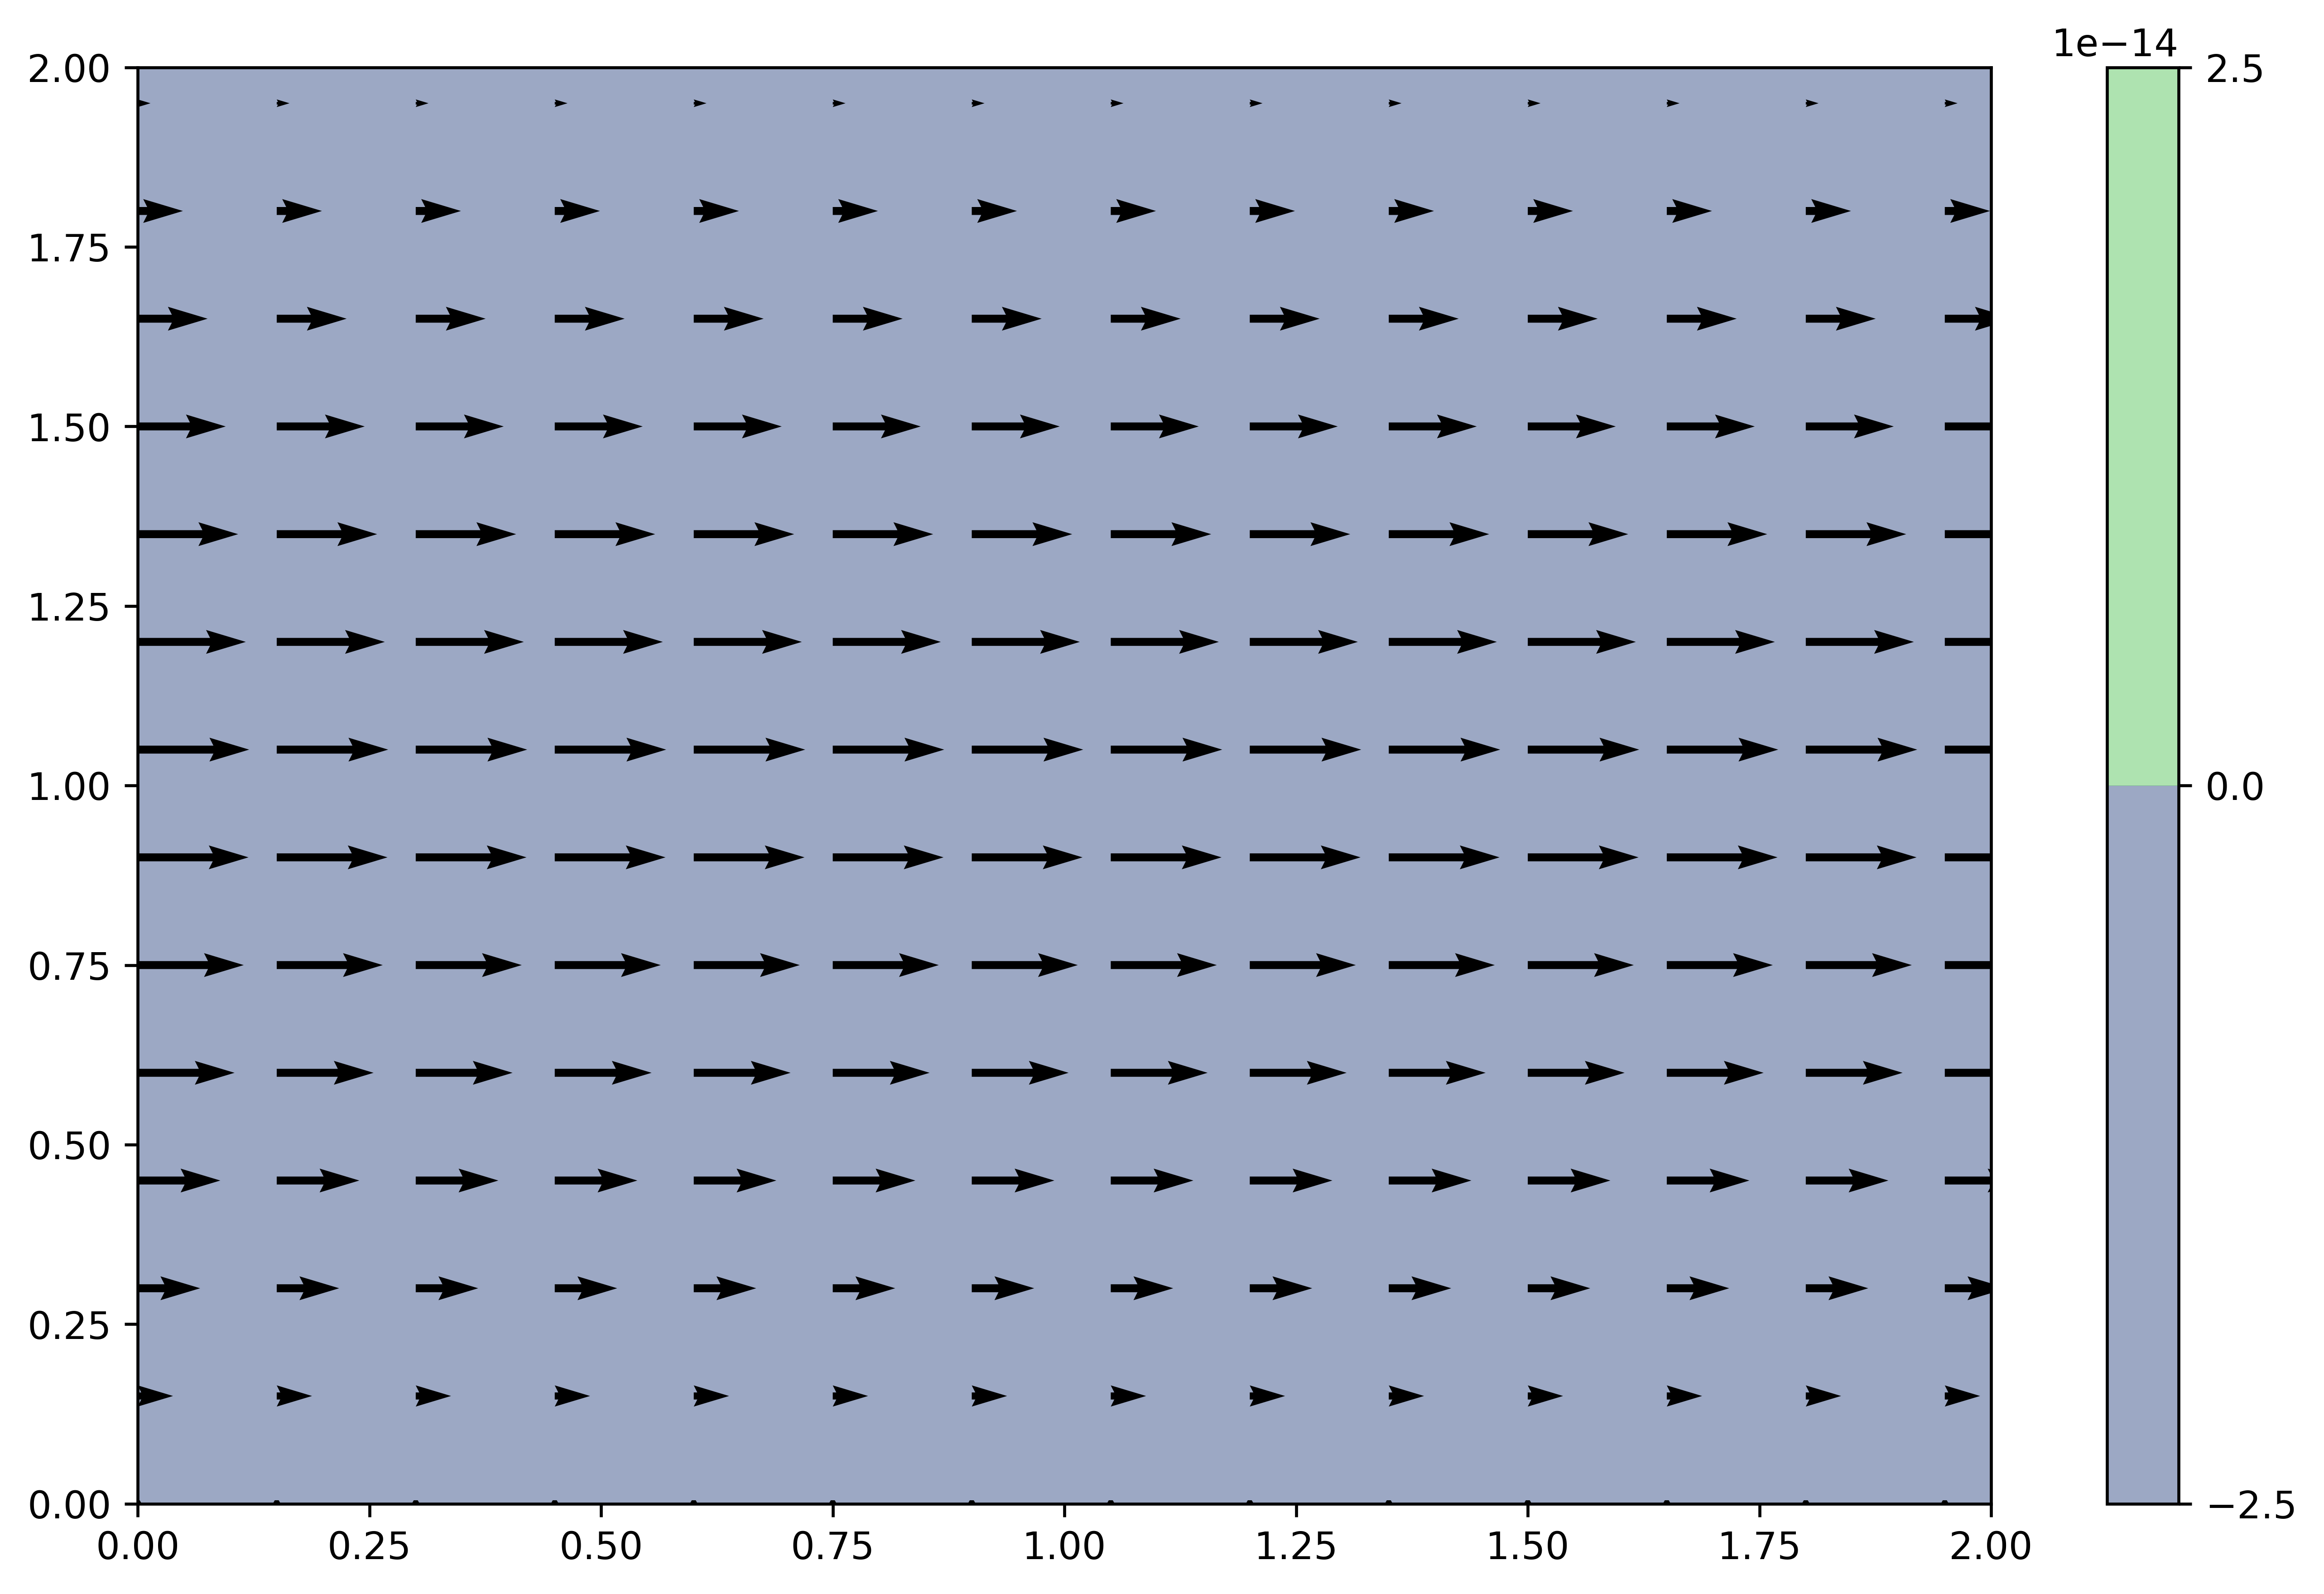

In [77]:
plot_channel(u, v, p)